Training Original Model (Stride=2)...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8614 - loss: 0.4715 - val_accuracy: 0.9693 - val_loss: 0.0987
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9709 - loss: 0.0942 - val_accuracy: 0.9770 - val_loss: 0.0701
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9779 - val_loss: 0.0676
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9875 - loss: 0.0420 - val_accuracy: 0.9806 - val_loss: 0.0608
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0326 - val_accuracy: 0.9833 - val_loss: 0.0529
Original Model (Stride=2) Test Accuracy: 0.9833

Training Modified Model (Stride=3)...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7777 - loss: 0.7158 - val_accuracy: 0.9411 - val_loss: 0.1925
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9406 - loss: 0.1915 - val_accuracy

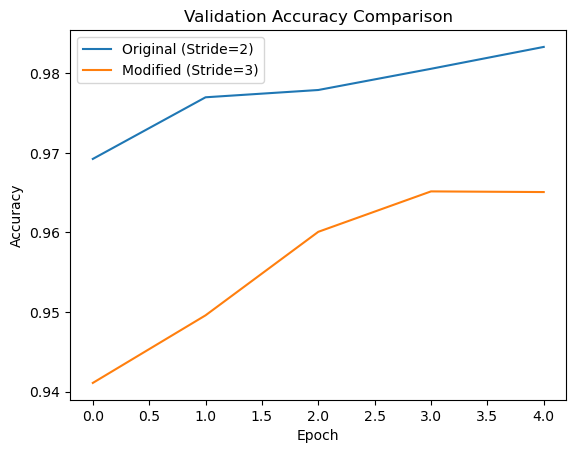

 Test Accuracy:
Original Model i.e. stride=2 : 0.9833 
 Modified Model i.e. stride=3 : 0.9680


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.datasets import mnist


# Loading and preprocessing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# convolution model (stride = 2)

def buildModelOriginal():
    model = Sequential([
        Conv2D(32, (3, 3), strides=2, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Convolution model (stride = 3)
def buildModelModifiedStride():
    model = Sequential([
        Conv2D(32, (3, 3), strides=3, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model training and evaluation
def trainAndEvaluateModel(model, x_train, y_train, x_test, y_test, model_name):
    print(f"Training {model_name}...")
    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{model_name} Test Accuracy: {test_acc:.4f}\n")
    return history, test_acc

# Building models
model_original = buildModelOriginal()
model_modified_stride = buildModelModifiedStride()

# Model training and evaluation
history_original, acc_original = trainAndEvaluateModel(model_original, x_train, y_train, x_test, y_test, "Original Model (Stride=2)")
history_modified, acc_modified = trainAndEvaluateModel(model_modified_stride, x_train, y_train, x_test, y_test, "Modified Model (Stride=3)")

# Displaying the results
plt.plot(history_original.history['val_accuracy'], label='Original (Stride=2)')
plt.plot(history_modified.history['val_accuracy'], label='Modified (Stride=3)')
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Final observations
print(f" Test Accuracy:\nOriginal Model i.e. stride=2 : {acc_original:.4f} \n Modified Model i.e. stride=3 : {acc_modified:.4f}")


In [ ]:
# Conclusion:
# From the above result, we can conclude that the original model which is stride 2 gave the accuracy of around 98% while
# the modified model stride 3 produced the accuracy of around 96%. Thus, as a result the modified model stride 3 performed well.